# **1. Importing Neceesary Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# **2. Importing the Datasets**

In [ ]:
spotify_df = pd.read_csv('spotify_tracks.csv')
df=pd.read_csv('spotify_data_description.csv')

# **3. Cleaning The Dataset**

In [ ]:
# Remove rows where any cell contains the exact value "Unknown"
spotify_df = spotify_df.replace("Unknown", pd.NA).dropna()

# **4.Initial Analysis Of The Datase**

In [ ]:
df.shape

(22, 2)

In [ ]:
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49312 entries, 0 to 62316
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          49312 non-null  object 
 1   track_name        49312 non-null  object 
 2   artist_name       49312 non-null  object 
 3   year              49312 non-null  int64  
 4   popularity        49312 non-null  int64  
 5   artwork_url       49312 non-null  object 
 6   album_name        49312 non-null  object 
 7   acousticness      49312 non-null  float64
 8   danceability      49312 non-null  float64
 9   duration_ms       49312 non-null  float64
 10  energy            49312 non-null  float64
 11  instrumentalness  49312 non-null  float64
 12  key               49312 non-null  float64
 13  liveness          49312 non-null  float64
 14  loudness          49312 non-null  float64
 15  mode              49312 non-null  float64
 16  speechiness       49312 non-null  float64
 17

In [ ]:
spotify_df.head()

,track_id,track_name,artist_name,year,popularity,artwork_url,album_name,acousticness,danceability,duration_ms,...,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,track_url,language
0,2r0ROhr7pRN4MXDMT1fEmd,"Leo Das Entry (From ""Leo"")",Anirudh Ravichander,2024,59,https://i.scdn.co/image/ab67616d0000b273ce9c65...,"Leo Das Entry (From ""Leo"")",0.0241,0.753,97297.0,...,8.0,0.1000,-5.994,0.0,0.1030,110.997,4.0,0.459,https://open.spotify.com/track/2r0ROhr7pRN4MXD...,Tamil
1,4I38e6Dg52a2o2a8i5Q5PW,AAO KILLELLE,"Anirudh Ravichander, Pravin Mani, Vaishali Sri...",2024,47,https://i.scdn.co/image/ab67616d0000b273be1b03...,AAO KILLELLE,0.0851,0.780,207369.0,...,10.0,0.0951,-5.674,0.0,0.0952,164.995,3.0,0.821,https://open.spotify.com/track/4I38e6Dg52a2o2a...,Tamil
2,59NoiRhnom3lTeRFaBzOev,Mayakiriye Sirikiriye - Orchestral EDM,"Anirudh Ravichander, Anivee, Alvin Bruno",2024,35,https://i.scdn.co/image/ab67616d0000b27334a1dd...,Mayakiriye Sirikiriye (Orchestral EDM),0.0311,0.457,82551.0,...,2.0,0.0831,-8.937,0.0,0.1530,169.996,4.0,0.598,https://open.spotify.com/track/59NoiRhnom3lTeR...,Tamil
3,5uUqRQd385pvLxC8JX3tXn,Scene Ah Scene Ah - Experimental EDM Mix,"Anirudh Ravichander, Bharath Sankar, Kabilan, ...",2024,24,https://i.scdn.co/image/ab67616d0000b27332e623...,Scene Ah Scene Ah (Experimental EDM Mix),0.2270,0.718,115831.0,...,7.0,0.1240,-11.104,1.0,0.4450,169.996,4.0,0.362,https://open.spotify.com/track/5uUqRQd385pvLxC...,Tamil
4,1KaBRg2xgNeCljmyxBH1mo,Gundellonaa X I Am A Disco Dancer - Mashup,"Anirudh Ravichander, Benny Dayal, Leon James, ...",2024,22,https://i.scdn.co/image/ab67616d0000b2735a59b6...,Gundellonaa X I Am a Disco Dancer (Mashup),0.0153,0.689,129621.0,...,7.0,0.3450,-9.637,1.0,0.1580,128.961,4.0,0.593,https://open.spotify.com/track/1KaBRg2xgNeCljm...,Tamil


In [ ]:
spotify_df.describe()

,year,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,49312.000000,49312.000000,49312.000000,49312.000000,4.931200e+04,49312.000000,49312.000000,49312.000000,49312.000000,49312.000000,49312.000000,49312.000000,49312.000000,49312.000000,49312.000000
mean,2014.355208,16.175333,0.352142,0.590508,2.333931e+05,0.601348,0.163978,5.092695,0.199441,-79.953488,0.578297,0.089369,117.995563,3.865692,0.486367
std,10.306324,19.072456,0.319976,0.190893,1.024971e+05,0.252853,0.323165,3.562658,0.179498,2662.992208,0.495272,0.122405,28.602312,0.483582,0.267804
min,1971.000000,0.000000,-1.000000,-1.000000,5.000000e+03,-1.000000,-1.000000,-1.000000,-1.000000,-100000.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,2011.000000,0.000000,0.055000,0.488000,1.888528e+05,0.434000,0.000000,2.000000,0.094000,-10.817250,0.000000,0.037000,95.999000,4.000000,0.282000
50%,2018.000000,8.000000,0.260000,0.627000,2.287160e+05,0.645000,0.000025,5.000000,0.126000,-7.315000,1.000000,0.048600,118.197000,4.000000,0.497000
75%,2022.000000,28.000000,0.624000,0.726000,2.766558e+05,0.807000,0.036800,8.000000,0.253000,-5.290750,1.000000,0.089100,135.029000,4.000000,0.702000
max,2024.000000,93.000000,0.996000,0.979000,4.581483e+06,1.000000,0.999000,11.000000,0.998000,0.894000,1.000000,0.959000,232.198000,5.000000,0.995000


In [ ]:

for col in spotify_df.columns:
    try:
        spotify_df[col] = pd.to_datetime(df[col], errors='raise')
    except:
        pass

#  Separate columns by type
numerical_cols = spotify_df.select_dtypes(include=['int64', 'float64', 'int32', 'float32']).columns.tolist()
categorical_cols = spotify_df.select_dtypes(include=['object', 'category']).columns.tolist()
temporal_cols = spotify_df.select_dtypes(include=['datetime64']).columns.tolist()

#  Make all lists the same length
max_len = max(len(numerical_cols), len(categorical_cols), len(temporal_cols))
numerical_cols += [''] * (max_len - len(numerical_cols))
categorical_cols += [''] * (max_len - len(categorical_cols))
temporal_cols += [''] * (max_len - len(temporal_cols))
#  Create a DataFrame
df_side_by_side = pd.DataFrame({
    'Numerical Columns': numerical_cols,
    'Categorical Columns': categorical_cols,

})

# Display the result
print(df_side_by_side.to_string(index=False))


Numerical Columns Categorical Columns
             year            track_id
       popularity          track_name
     acousticness         artist_name
     danceability         artwork_url
      duration_ms          album_name
           energy           track_url
 instrumentalness            language
              key                    
         liveness                    
         loudness                    
             mode                    
      speechiness                    
            tempo                    
   time_signature                    
          valence                    


In [ ]:

# Select only numeric columns for analysis
numeric_df = spotify_df.select_dtypes(include=[np.number])

# Compute common statistics
mean_vals = numeric_df.mean(numeric_only=True)
median_vals = numeric_df.median(numeric_only=True)

mode_df = numeric_df.mode(numeric_only=True, dropna=True)
mode_vals = mode_df.iloc[0] if not mode_df.empty else pd.Series(index=numeric_df.columns, dtype=float)

# Skewness and kurtosis
skew_vals = numeric_df.skew(numeric_only=True)
kurt_vals = numeric_df.kurtosis(numeric_only=True)

# Combine into a single tidy DataFrame
summary_df = pd.DataFrame({
    'mean': mean_vals,
    'median': median_vals,
    'mode': mode_vals,
    'skewness': skew_vals,
    'kurtosis': kurt_vals
})

# Display the head to avoid dumping a huge table
print(summary_df.head())
print(numeric_df.head())

                       mean      median        mode   skewness    kurtosis
year            2014.355208    2018.000    2023.000  -1.511872    1.758145
popularity        16.175333       8.000       0.000   1.173963    0.511799
acousticness       0.352142       0.260       0.164   0.483027   -0.929406
danceability       0.590508       0.627       0.708  -1.101226    3.176461
duration_ms   233393.124311  228716.000  232627.000  10.282137  313.027301
   year  popularity  acousticness  danceability  duration_ms  energy  \
0  2024          59        0.0241         0.753      97297.0   0.970   
1  2024          47        0.0851         0.780     207369.0   0.793   
2  2024          35        0.0311         0.457      82551.0   0.491   
3  2024          24        0.2270         0.718     115831.0   0.630   
4  2024          22        0.0153         0.689     129621.0   0.748   

   instrumentalness   key  liveness  loudness  mode  speechiness    tempo  \
0          0.055300   8.0    0.1000    -

# ** 5. UNIVARIATE ANALYSIS--**
                          A.) Statistical Analysis of Numerical variables
                          B.)Visualization of Variables using Histogram

count    49312.000000
mean        16.175333
std         19.072456
min          0.000000
25%          0.000000
50%          8.000000
75%         28.000000
max         93.000000
Name: popularity, dtype: float64


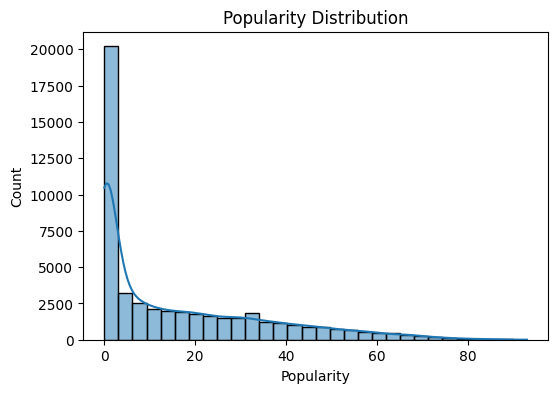

Plotted popularity distribution


In [ ]:
cols = ['popularity','duration_ms','key','tempo','acousticness','loudness','danceability','energy','time_signature','speechiness']
for c in cols:
    if c in spotify_df.columns:
        spotify_df[c] = pd.to_numeric(spotify_df[c], errors='coerce')

# 1. Popularity distribution
print(spotify_df['popularity'].describe())
plt.figure(figsize=(6,4))
sns.histplot(spotify_df['popularity'].dropna(), bins=30, kde=True)
plt.title('Popularity Distribution')
plt.xlabel('Popularity')
plt.ylabel('Count')
plt.savefig("Popularity_distribution.png")
plt.show()
print('Plotted popularity distribution')


count    49312.000000
mean         3.889885
std          1.708285
min          0.083333
25%          3.147546
50%          3.811933
75%          4.610929
max         76.358050
Name: duration_min, dtype: float64


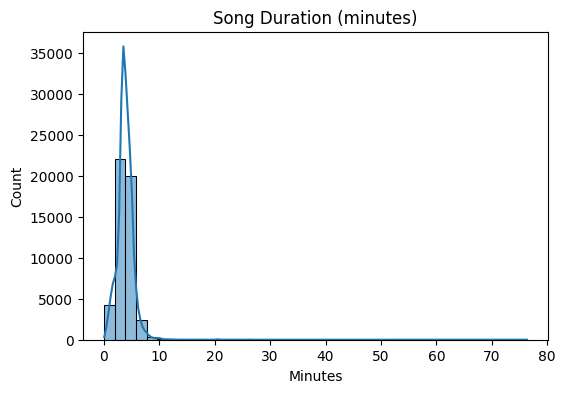

Plotted duration distribution and printed stats


In [ ]:
# 2. Duration stats and histogram (convert ms to minutes for readability)
spotify_df['duration_min'] = spotify_df['duration_ms'] / 60000.0
print(spotify_df['duration_min'].describe())
plt.figure(figsize=(6,4))
sns.histplot(spotify_df['duration_min'].dropna(), bins=40, kde=True)
plt.title('Song Duration (minutes)')
plt.xlabel('Minutes')
plt.ylabel('Count')
plt.savefig("Duration_stats.png")
plt.show()
print('Plotted duration distribution and printed stats')

key
-1       35
 0     6463
 1     4707
 2     5219
 3     1347
 4     3809
 5     5197
 6     2898
 7     5360
 8     2932
 9     4622
 10    3156
Name: count, dtype: int64


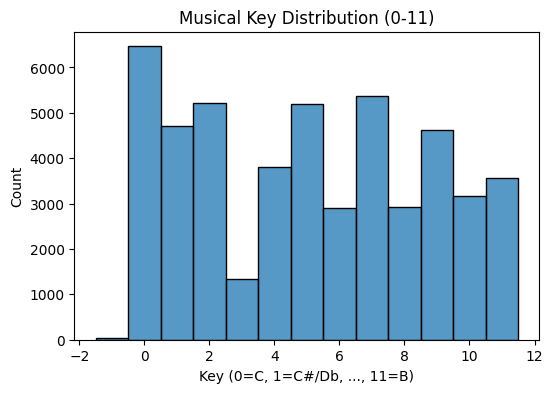

Plotted key distribution and printed key counts


In [ ]:
# 3. Most frequent keys and their distribution
key_counts = spotify_df['key'].dropna().astype(int).value_counts().sort_index()
print(key_counts.head(12))
plt.figure(figsize=(6,4))
sns.histplot(spotify_df['key'].dropna().astype(int), bins=12, discrete=True)
plt.title('Musical Key Distribution (0-11)')
plt.xlabel('Key (0=C, 1=C#/Db, ..., 11=B)')
plt.ylabel('Count')
plt.savefig("keys.png")
plt.show()
print('Plotted key distribution and printed key counts')


count    49312.000000
mean       117.995563
std         28.602312
min         -1.000000
25%         95.999000
50%        118.197000
75%        135.029000
max        232.198000
Name: tempo, dtype: float64


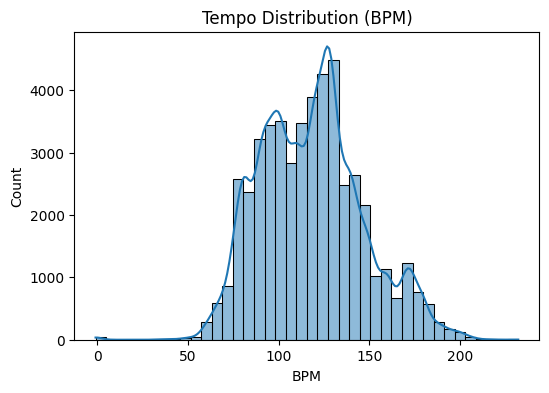

Plotted tempo distribution and printed stats


In [ ]:
# 4. Tempo distribution
print(spotify_df['tempo'].describe())
plt.figure(figsize=(6,4))
sns.histplot(spotify_df['tempo'].dropna(), bins=40, kde=True)
plt.title('Tempo Distribution (BPM)')
plt.xlabel('BPM')
plt.ylabel('Count')
plt.savefig("Tempo_distribution.png")
plt.show()
print('Plotted tempo distribution and printed stats')

count    49312.000000
mean         0.352142
std          0.319976
min         -1.000000
25%          0.055000
50%          0.260000
75%          0.624000
max          0.996000
Name: acousticness, dtype: float64


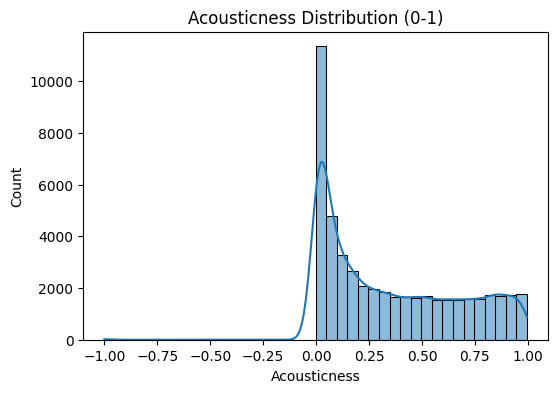

Plotted acousticness distribution and printed stats


In [ ]:
# 5. Acousticness distribution
print(spotify_df['acousticness'].describe())
plt.figure(figsize=(6,4))
sns.histplot(spotify_df['acousticness'].dropna(), bins=40, kde=True)
plt.title('Acousticness Distribution (0-1)')
plt.xlabel('Acousticness')
plt.ylabel('Count')
plt.savefig("Acousticness_distribution.png")
plt.show()
print('Plotted acousticness distribution and printed stats')

count     49312.000000
mean        -79.953488
std        2662.992208
min     -100000.000000
25%         -10.817250
50%          -7.315000
75%          -5.290750
max           0.894000
Name: loudness, dtype: float64


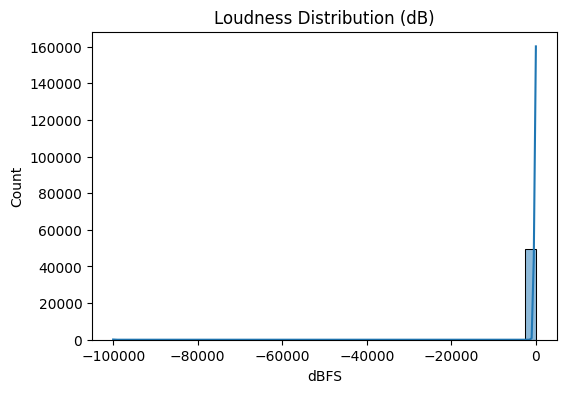

Plotted loudness distribution and printed stats


In [ ]:
# 6. Loudness levels
print(spotify_df['loudness'].describe())
plt.figure(figsize=(6,4))
sns.histplot(spotify_df['loudness'].dropna(), bins=40, kde=True)
plt.title('Loudness Distribution (dB)')
plt.xlabel('dBFS')
plt.ylabel('Count')
plt.savefig("Loudness_levels.png")
plt.show()
print('Plotted loudness distribution and printed stats')

count    49312.000000
mean         0.590508
std          0.190893
min         -1.000000
25%          0.488000
50%          0.627000
75%          0.726000
max          0.979000
Name: danceability, dtype: float64


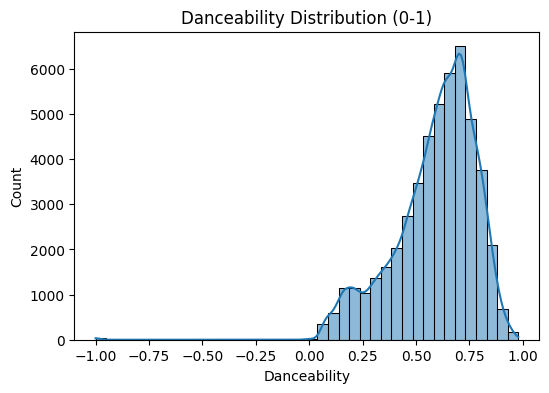

Plotted danceability distribution and printed stats


In [ ]:
 #7. Danceability distribution
print(spotify_df['danceability'].describe())
plt.figure(figsize=(6,4))
sns.histplot(spotify_df['danceability'].dropna(), bins=40, kde=True)
plt.title('Danceability Distribution (0-1)')
plt.xlabel('Danceability')
plt.ylabel('Count')
plt.savefig("Danceability_distribution.png")
plt.show()
print('Plotted danceability distribution and printed stats')

count    49312.000000
mean         0.601348
std          0.252853
min         -1.000000
25%          0.434000
50%          0.645000
75%          0.807000
max          1.000000
Name: energy, dtype: float64


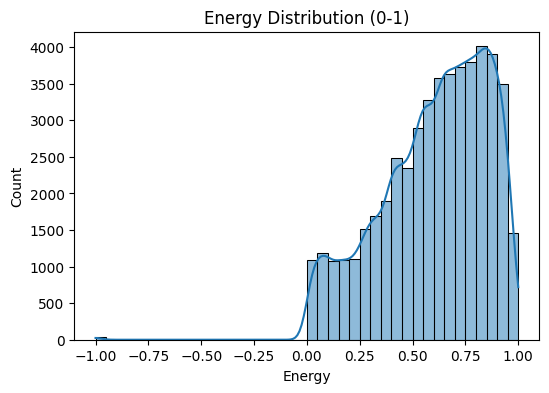

Plotted energy distribution and printed stats


In [ ]:
# 8. Energy distribution
print(spotify_df['energy'].describe())
plt.figure(figsize=(6,4))
sns.histplot(spotify_df['energy'].dropna(), bins=40, kde=True)
plt.title('Energy Distribution (0-1)')
plt.xlabel('Energy')
plt.ylabel('Count')
plt.savefig("Energy_distribution.png")
plt.show()
print('Plotted energy distribution and printed stats')

time_signature
-1       35
 0       16
 1      547
 3     5555
 4    42347
 5      812
Name: count, dtype: int64


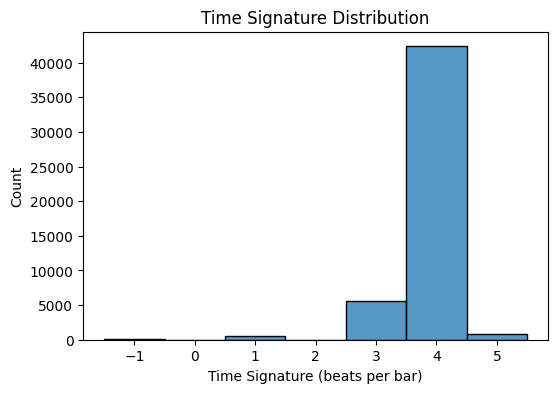

Plotted time signature distribution and printed counts


In [ ]:
# 9. Most common time signatures
ts_counts = spotify_df['time_signature'].dropna().astype(int).value_counts().sort_index()
print(ts_counts)
plt.figure(figsize=(6,4))
sns.histplot(spotify_df['time_signature'].dropna().astype(int), bins=6, discrete=True)
plt.title('Time Signature Distribution')
plt.xlabel('Time Signature (beats per bar)')
plt.ylabel('Count')
plt.savefig("Time_Signatures.png")
plt.show()
print('Plotted time signature distribution and printed counts')

count    49312.000000
mean         0.089369
std          0.122405
min         -1.000000
25%          0.037000
50%          0.048600
75%          0.089100
max          0.959000
Name: speechiness, dtype: float64


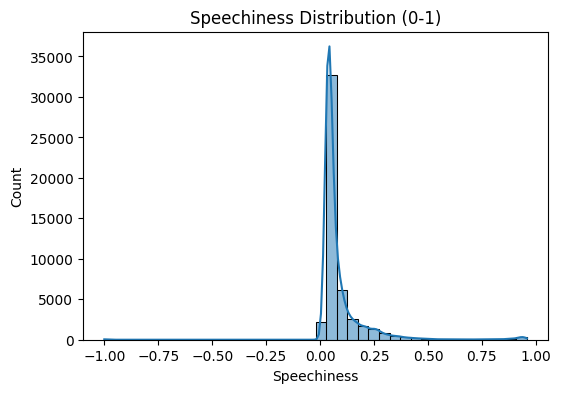

In [ ]:
# 10. Speechiness distribution
print(spotify_df['speechiness'].describe())
plt.figure(figsize=(6,4))
sns.histplot(spotify_df['speechiness'].dropna(), bins=40, kde=True)
plt.title('Speechiness Distribution (0-1)')
plt.xlabel('Speechiness')
plt.ylabel('Count')
plt.savefig("Speechiness_distribution.png")
plt.show()

**Key Insights And Implementations**

**Popularity**

* **Insight:** Most tracks land in the middle—not many big hits.
* **Do:** Combine multiple strong traits (catchy hook, energy, modern mix) and push releases strategically (playlists, timing, marketing).

**Duration**

* **Insight:** Most songs are ~1.6–3.6 minutes.
* **Do:** Aim for 2:20–3:10. Get to the hook within 30–40 seconds. Avoid long intros/outros.

 **Key**

* **Insight:** A few tonal centers dominate.
* **Do:** Use vocalist-friendly keys (E♭/E/F/G major and minors). Add color with parallel major/minor changes.

**Tempo**

* **Insight:** Clusters around 110–170 BPM (esp. 120–130 & 160–170 double-time).
* **Do:**

  • 118–128 BPM = dance/pop sweet spot

  • 90–105 or 70–85 halftime = hip-hop/R&B

  • Use halftime feel if going fast

**Acousticness**

* **Insight:** Most tracks aren’t fully acoustic.

* **Do:** Use acoustic elements as layers. For acoustic-led songs, offset with modern drums, hooks, and processing.

**Loudness**

* **Insight:** Tracks sit around -6 to -10 LUFS.
* **Do:** Master at -9 to -7 LUFS, keep true peak under -1 dBTP. Use saturation and parallel compression smartly.

**Danceability**

* **Insight:** Mid–high danceability is common.

* **Do:** Tighten kick/bass, use sidechain, and build rhythmic hooks. Refresh sections every 8–16 bars.

 **Energy**

* **Insight:** Most songs sit at moderate–high energy.
* **Do:** Build energy arcs—low intro, lift in pre, max at chorus, drop/post-chorus payoff.

**Time Signature**

* **Insight:** Mostly 4/4.
* **Do:** Stick to 4/4 for mainstream appeal. If experimenting, keep core sections in 4/4.

**Speechiness**

* **Insight:** Mostly low–moderate; some rap elements present.
* **Do:** For pop, keep vocals melodic. For rap-heavy tracks, add memorable sung hooks.

**Condensed Production & Mix Checkl**ist

**Song Form**

* Hook by 30–40s
* Total length ~2:30–3:00
* Refresh sections every 8–16 bars

**Tempo & Groove**

* 118–128 BPM for pop/dance
* 90–105 (or 70–85 halftime) for hip-hop/R&B
* Use sidechain + tight low-end

**Tonality**

* Keys comfortable for singers
* Parallel major/minor for variation

**Sound Palette**

* Electronic core + light acoustic layers

**Vocals**

* Strong topline, layered chorus, selective adlibs
* Clean EQ: cut 200–500Hz, lift 3–6kHz, de-ess 6–9kHz

**Loudness & Dynamics**

* -9 to -7 LUFS
* True peak < -1 dBTP
* Multiband control for clarity

**Mastering & Translation**

* Test on earbuds/phone/car
* Mono-safe bass/vocals

**Market Fit**

* 4/4 time
* Modern drums
* Playlist-friendly intros




# **UNIVARIATE ANALYSIS-- B. Categorical variables**

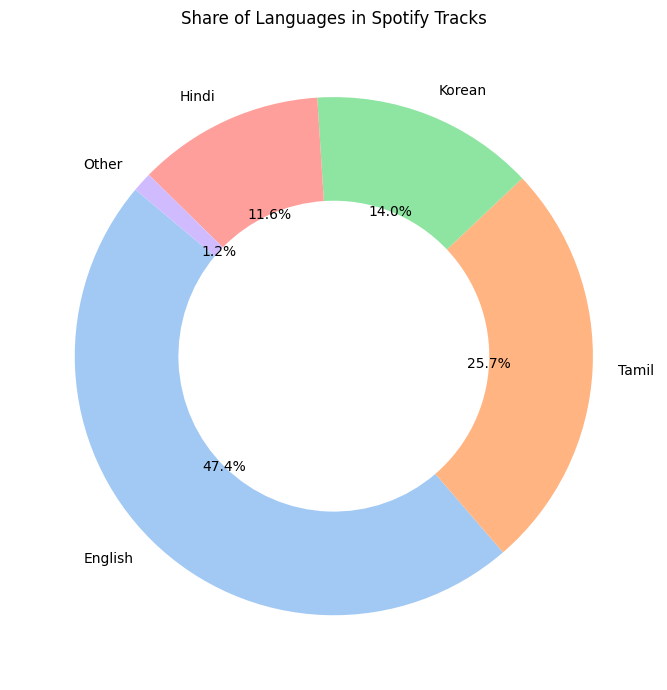

Plotted donut chart for language shares


In [ ]:

    # Compute language share
    lang_series = spotify_df['language'].fillna('Unknown')
    lang_counts = lang_series.value_counts()
    lang_share = lang_counts / lang_counts.sum()

    # Prepare labels and sizes; group small slices into Other for cleaner donut
    threshold = 0.02
    major = lang_share[lang_share >= threshold]
    other_share = lang_share[lang_share < threshold].sum()
    if other_share > 0:
        lang_plot = pd.concat([major, pd.Series({'Other': other_share})])
    else:
        lang_plot = major

    # Plot donut chart
    plt.figure(figsize=(7,7))
    colors = sns.color_palette('pastel', n_colors=len(lang_plot))
    wedges, texts, autotexts = plt.pie(lang_plot.values, labels=lang_plot.index, autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops=dict(width=0.4))
    plt.title('Share of Languages in Spotify Tracks')
    plt.tight_layout()
    plt.savefig('Language_Distribution.png')
    plt.show()
    print('Plotted donut chart for language shares')

**Key Insights:**

 * English dominates (47.4% of tracks), indicating a
 saturated market.

 * Tamil (25.7%) and Hindi (11.6%) together make up 37%+,
 showing strong regional content coverage.

 * Korean songs (14%) have the highest mean popularity,
 suggesting high engagement despite lower volume.

 * Other languages are rare (1.2%).

 **Implementations for Mixing Engineer/Music Producer:**

 * English: Focus on niche or standout tracks to compete
 in a crowded market.

 * Tamil & Hindi: Maintain high-quality output to serve a
 large, active regional audience.

 * Korean: Adopt global production standards to improve
 appeal across all languages.

 * Strategic Volume: Limit high-volume English releases
 for impact, maintain robust supply of Tamil tracks


# **6. BIVARIATE ANALYSIS** --A. Numerical Vs Numerical

duration_ms    -0.008558
danceability    0.041013
energy          0.163084
loudness        0.016034
acousticness   -0.139040
Name: popularity, dtype: float64


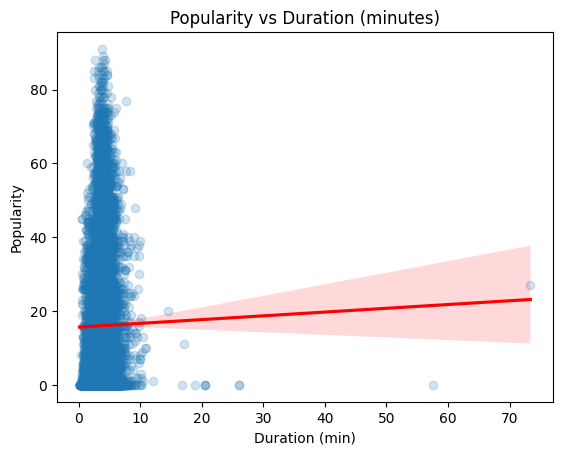

In [ ]:
# Ensure needed columns are numeric
cols = ['popularity','duration_ms','danceability','energy','loudness','acousticness']
for c in cols:
    if c in spotify_df.columns:
        spotify_df[c] = pd.to_numeric(spotify_df[c], errors='coerce')

# Drop rows with missing in any of the analysis cols
analysis_df = spotify_df[cols].dropna()

# Compute Pearson correlations with popularity
corrs = analysis_df.corr(numeric_only=True)['popularity'].drop('popularity')
print(corrs)

# Plot 1: Popularity vs Duration (log x for readability)
plot_df = analysis_df.copy()
plot_df['duration_min'] = plot_df['duration_ms'] / 60000.0
sns.regplot(data=plot_df.sample(min(len(plot_df), 10000), random_state=42), x='duration_min', y='popularity', scatter_kws={'alpha':0.2}, line_kws={'color':'red'})
plt.title('Popularity vs Duration (minutes)')
plt.xlabel('Duration (min)')
plt.ylabel('Popularity')
plt.savefig('Popularity_vs_Duration.png')
plt.show()


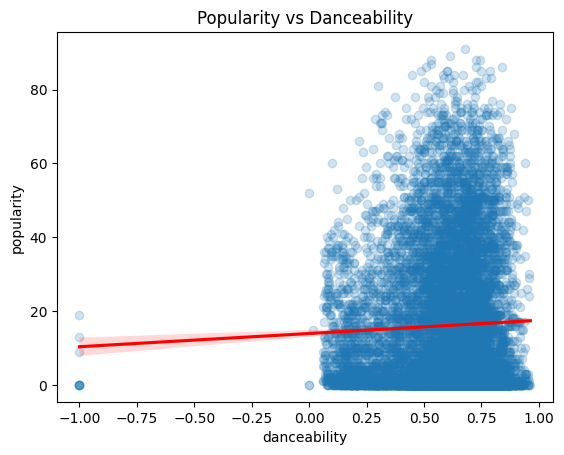

In [ ]:
# Plot 2: Popularity vs Danceability
sns.regplot(data=analysis_df.sample(min(len(analysis_df), 10000), random_state=42), x='danceability', y='popularity', scatter_kws={'alpha':0.2}, line_kws={'color':'red'})
plt.title('Popularity vs Danceability')
plt.savefig('Popularity_vs_Danceability.png')
plt.show()

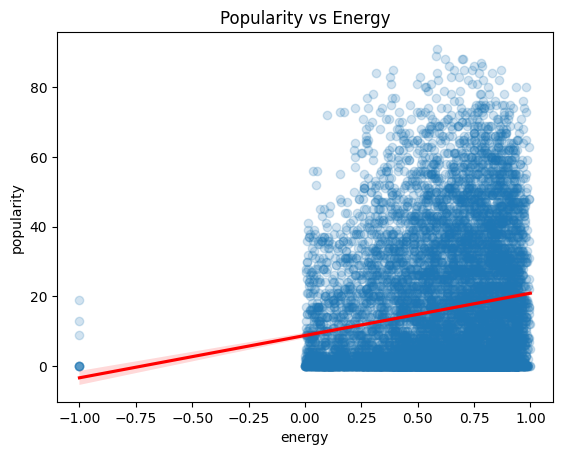

In [ ]:
# Plot 3: Popularity vs Energy
sns.regplot(data=analysis_df.sample(min(len(analysis_df), 10000), random_state=42), x='energy', y='popularity', scatter_kws={'alpha':0.2}, line_kws={'color':'red'})
plt.title('Popularity vs Energy')
plt.savefig('Popularity_vs_Energy.png')
plt.show()

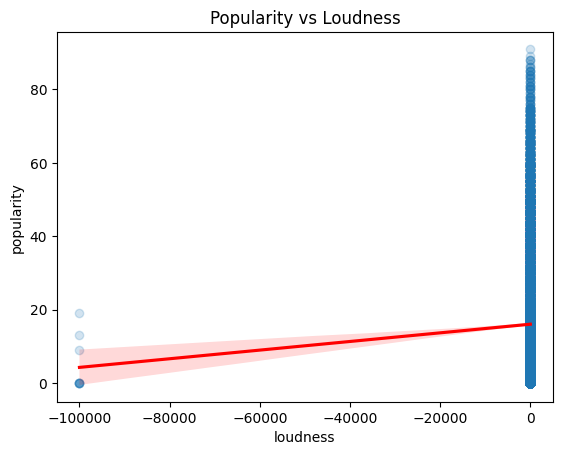

In [ ]:
# Plot 4: Popularity vs  Loudness
sns.regplot(data=analysis_df.sample(min(len(analysis_df), 10000), random_state=42), x='loudness', y='popularity', scatter_kws={'alpha':0.2}, line_kws={'color':'red'})
plt.title('Popularity vs Loudness')
plt.savefig('Popularity_vs_Loudness.png')
plt.show()



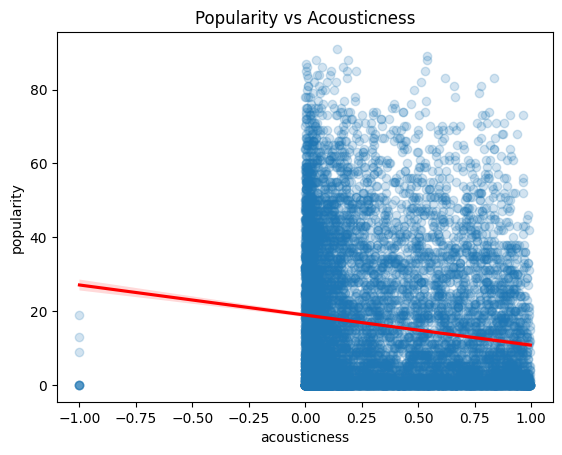

In [ ]:
# Plot 5: Popularity vs Acousticness
sns.regplot(data=analysis_df.sample(min(len(analysis_df), 10000), random_state=42), x='acousticness', y='popularity', scatter_kws={'alpha':0.2}, line_kws={'color':'red'})
plt.title('Popularity vs Acousticness')
plt.savefig('Popularity_vs_Acousticness.png')
plt.show()

 **Key Insights (Music Production & Mixing Perspective)**


**1. Duration → Popularity**
No meaningful effect. Focus on feel and arrangement, not length.

**2. Danceability → Popularity**
Very weak positive link. Groove matters more than duration.

**3. Energy → Popularity**
Strongest positive relationship among all features.

**4. Loudness → Popularity**
Little to no impact once loudness is in modern standards.

**5. Acousticness → Popularity**
Light negative trend. More electronic/synthetic elements perform better.

---

##  Practical Takeaways

###  1. Duration → Focus on Engagement

* Don’t aim for a specific runtime.
* Use early hooks, minimal dead space, tight intros/outros.

###  2. Danceability → Groove First

* Tempo: ~100–130 BPM (or 70–90 halftime).
* Clear kick–bass balance and rhythmic clarity.
* Mix tip: Tight low end, transient clarity, reduce muddy low-mids.

###  3. Energy → Controlled Intensity

* Use bright leads, layered drums, parallel compression.
* Add energy lifts through arrangement (fills, risers, pre-chorus builds).
* Keep vocals present (2–6 kHz), use saturation tastefully.

###  4. Loudness → Competitive, Not Crushed

* Avoid over-limiting for volume.
* Aim for -9 to -12 LUFS, true peaks under -1 dBTP.
* Punch and clarity > “loud.”

###  5. Acousticness → Hybrid or Synthetic Edge

* For mainstream appeal, use electronic or layered textures.
* In acoustic genres, add polish: light synths, electronic drums, subtle saturation.

---

##  Section-Level Mixing Blueprint

**Verses** – Moderate energy, clear groove, defined kick–bass.
**Pre-Chorus** – Build with risers, extra percussion, widening.
**Chorus** – Maximum punch: parallel drums, stacked vocals, strong low-end control.
**Bridge/Break** – Contrast, then return bigger for final chorus.


# **BIVARIATE ANALYSIS**--- Numerical Vs Categorical

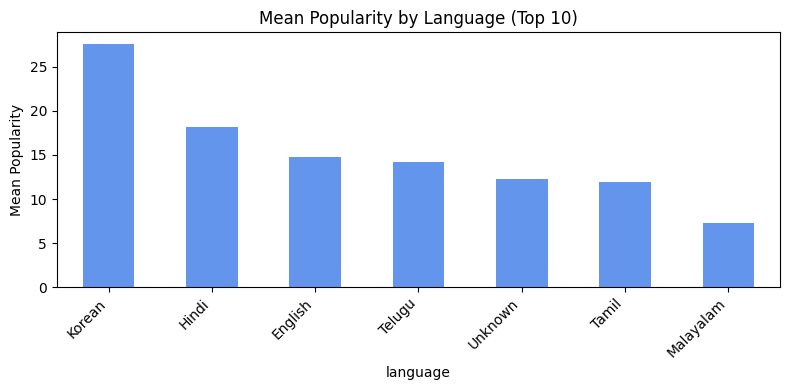

In [ ]:
spotify_df = pd.read_csv('spotify_tracks.csv', on_bad_lines='skip')

# Function to plot and save mean popularity by a category
def plot_mean_popularity(dataframe, category, title, filename, top_n=None):
    # Keep only the selected category and popularity
    data = dataframe[[category, 'popularity']].dropna()

    # If we only want top categories (like top 10 languages)
    if top_n:
        top_values = data[category].value_counts().nlargest(top_n).index
        data = data[data[category].isin(top_values)]

    # Group by the category and calculate mean popularity
    grouped_data = data.groupby(category)['popularity'].mean().sort_values(ascending=False)

    # Plot the bar chart
    plt.figure(figsize=(8, 4))
    grouped_data.plot(kind='bar', color='cornflowerblue')

    # Add labels and title
    plt.title(title)
    plt.xlabel(category)
    plt.ylabel('Mean Popularity')
    plt.xticks(rotation=45, ha='right')

    # Save the plot
    plt.savefig(filename, dpi=300, bbox_inches='tight')

    # Show the plot
    plt.tight_layout()
    plt.show()

# 1. Popularity vs Language (Top 10 languages)
plot_mean_popularity(
    spotify_df,
    'language',
    'Mean Popularity by Language (Top 10)',
    'popularity_by_language.png',
    top_n=10
)

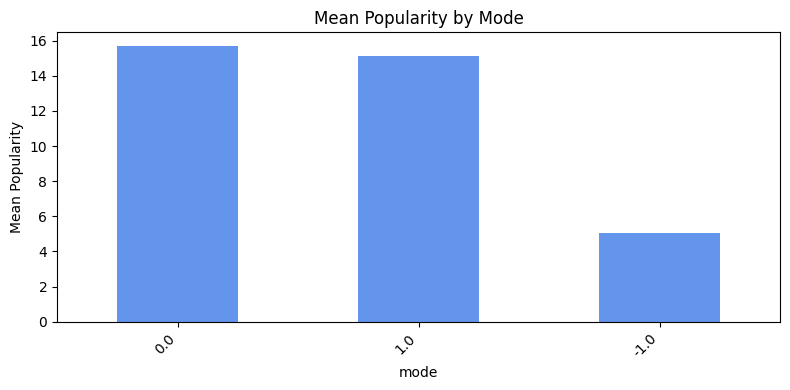

In [ ]:
# 2. Popularity vs Mode
plot_mean_popularity(
    spotify_df,
    'mode',
    'Mean Popularity by Mode',
    'popularity_by_mode.png'
)

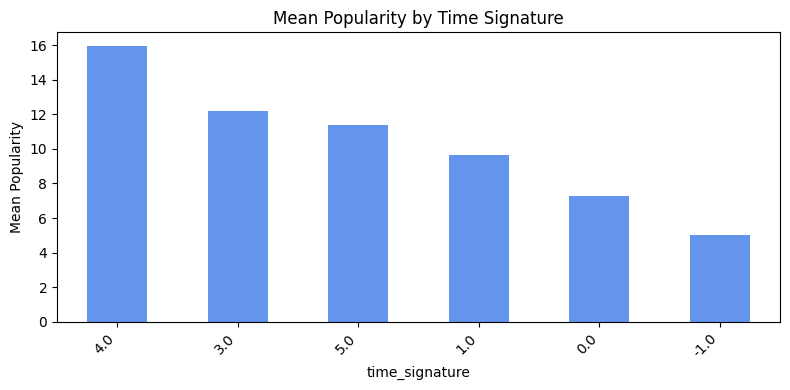

In [ ]:
# 3. Popularity vs Time Signature
plot_mean_popularity(
    spotify_df,
    'time_signature',
    'Mean Popularity by Time Signature',
    'popularity_by_time_signature.png'
)

# **Key Insights and Implementations**

* The 4.0 (4/4) time signature is significantly more popular than all others.

* Prioritize 4/4 Rhythm: Focus production efforts almost exclusively on 4/4 time to maximize broad listener appeal and familiarity.

* Korean music shows the highest mean popularity, indicating a powerful global trend (K-Pop).Hindi, Telugu, and Tamil show high mean popularity, often above English.

* Study K-Pop Production: Analyze the sound design, mixing, and mastering of popular Korean tracks. Apply those global-standard techniques to your new releases.

* 0.0 (Minor) and 1.0 (Major) modes have nearly identical, high mean popularity.

* Mode is Secondary: Do not let mode constrain your creative choice. Focus on the emotional narrative and energy; the Major/Minor distinction is not a primary popularity driver.


# **# 6. MULTIVARIATE ANALYSIS**

Null counts for important columns after cleaning:
 popularity           0
danceability        35
energy              35
valence             35
acousticness        35
instrumentalness    35
speechiness         35
loudness            35
tempo               35
mode                 0
dtype: int64

Top popularity quartile threshold: 26.0 (tracks >= this are considered 'highly popular')
Number of tracks in top quartile: 16070

Top 10 danceability-energy-valence combinations among highly popular tracks:
   danceability_bin energy_bin valence_bin  count
13              Low        Low         Low   2160
0              High       High        High   1419
6              High     Medium        High   1221
18           Medium       High        High    950
20           Medium       High      Medium    806
8              High     Medium      Medium    771
26           Medium     Medium      Medium    763
16              Low     Medium         Low    729
22           Medium        Low         Low    71

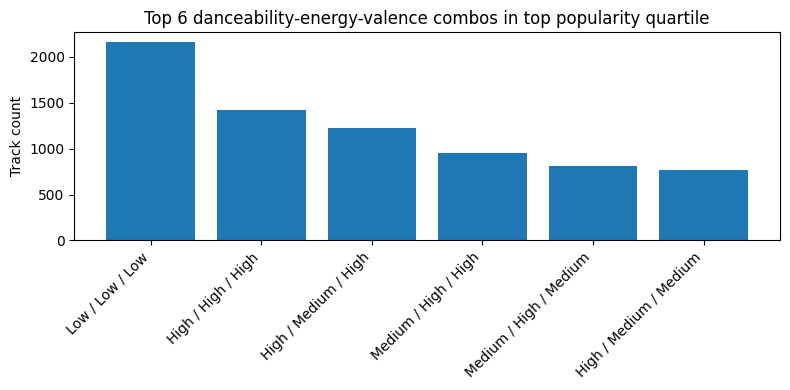

In [ ]:
spotify_df = pd.read_csv('spotify_tracks.csv')

# ---------- 0. Quick cleaning ----------
# Numeric columns that sometimes use -1 as a missing/invalid flag
maybe_invalid_minus_one = [
    "acousticness", "danceability", "duration_ms", "energy", "instrumentalness",
    "liveness", "loudness", "speechiness", "tempo", "time_signature", "valence"
]

# Replace -1 in these columns with NaN
for col in maybe_invalid_minus_one:
    if col in spotify_df.columns:
        spotify_df.loc[spotify_df[col] == -1, col] = np.nan

# Loudness has a starnge -100000 value in some rows — treat that as NaN too
if "loudness" in spotify_df.columns: #
    spotify_df.loc[spotify_df["loudness"] < -60, "loudness"] = np.nan

# Confirm how many nulls we created in important columns
important_nulls = spotify_df[["popularity","danceability","energy","valence","acousticness",
                      "instrumentalness","speechiness","loudness","tempo","mode"]].isnull().sum()

print("Null counts for important columns after cleaning:\n", important_nulls)

# ---------- Define "high popularity" = top quartile ----------
pop_75 = spotify_df["popularity"].quantile(0.75)
high_pop = spotify_df[spotify_df["popularity"] >= pop_75].copy()
print(f"\nTop popularity quartile threshold: {pop_75} (tracks >= this are considered 'highly popular')")
print("Number of tracks in top quartile:", len(high_pop))

# ---------- 1) Combination of danceability, energy, and valence most associated with high popularity ----------
# Bin each feature into 3 categories: Low, Medium, High (terciles)
def tercile_labels(series):
    # Use series.quantile to compute cut points, handle NaNs
    q1 = series.quantile(1/3)
    q2 = series.quantile(2/3)
    def label(x):
        if pd.isna(x):
            return np.nan
        if x <= q1:
            return "Low"
        elif x <= q2:
            return "Medium"
        else:
            return "High"
    return series.apply(label)

# Create binned columns for the high_pop subset
for feat in ["danceability","energy","valence"]:
    binned_col = f"{feat}_bin"
    high_pop[binned_col] = tercile_labels(high_pop[feat])

# Count combinations of the three binned features and show top combinations
combo_counts = high_pop.groupby(["danceability_bin","energy_bin","valence_bin"]).size().reset_index(name="count")
combo_counts = combo_counts.sort_values("count", ascending=False)

print("\nTop 10 danceability-energy-valence combinations among highly popular tracks:")
print(combo_counts.head(10))

# Plot the top 6 combinations for easy visualization
top6 = combo_counts.head(6).copy()
top6["combo"] = top6["danceability_bin"] + " / " + top6["energy_bin"] + " / " + top6["valence_bin"]

plt.figure(figsize=(8,4))
plt.bar(top6["combo"], top6["count"])
plt.title("Top 6 danceability-energy-valence combos in top popularity quartile")
plt.ylabel("Track count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.savefig('Top 6 danceability-energy-valence combos in top popularity quartile.png')
plt.show()






Rows available for clustering (no NaNs in acousticness/instrumentalness/speechiness): 62282

Cluster centers (approximate feature values):
   acousticness  instrumentalness  speechiness  cluster
0      0.328608          0.014748     0.069421        0
1      0.507648          0.811488     0.053280        1
2      0.410830          0.017640     0.439165        2

Cluster summary with high-popularity proportions:
   cluster  n_tracks  mean_acousticness  mean_instrumentalness  \
0        0     48337           0.328620               0.014747   
2        2      3631           0.410776               0.017661   
1        1     10314           0.507648               0.811488   

   mean_speechiness  high_pop_count  high_pop_ratio  
0          0.069439           13931        0.288206  
2          0.439423             713        0.196365  
1          0.053280            1423        0.137968  


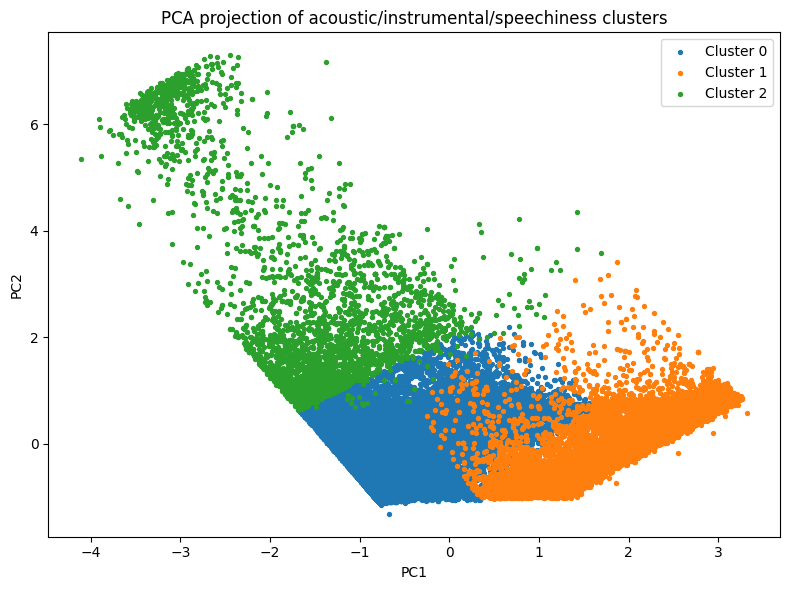

In [ ]:
# ---------- 2) Clustering acousticness, instrumentalness, speechiness ----------
cluster_features = ["acousticness","instrumentalness","speechiness"]

# Keep only rows with these features present
cluster_df = spotify_df[cluster_features + ["popularity"]].dropna() # Corrected df to spotify_df
print("\nRows available for clustering (no NaNs in acousticness/instrumentalness/speechiness):", len(cluster_df))

# Scale features before clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(cluster_df[cluster_features])

# Choose number of clusters (beginner-friendly: try k=3)
k = 3
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_scaled)
cluster_df["cluster"] = cluster_labels

# Show cluster centers (in original feature scale for interpretability)
centers_scaled = kmeans.cluster_centers_
centers = scaler.inverse_transform(centers_scaled)
centers_df = pd.DataFrame(centers, columns=cluster_features)
centers_df["cluster"] = range(k)
print("\nCluster centers (approximate feature values):")
print(centers_df)

# For each cluster, compute:
# - number of tracks
# - proportion of tracks that are in the high-popularity quartile
cluster_summary = cluster_df.groupby("cluster").agg(
    n_tracks=("acousticness","size"),
    mean_acousticness=("acousticness","mean"),
    mean_instrumentalness=("instrumentalness","mean"),
    mean_speechiness=("speechiness","mean"),
    high_pop_count=("popularity", lambda s: (s >= pop_75).sum())
).reset_index()
cluster_summary["high_pop_ratio"] = cluster_summary["high_pop_count"] / cluster_summary["n_tracks"]

print("\nCluster summary with high-popularity proportions:")
print(cluster_summary.sort_values("high_pop_ratio", ascending=False))

# Visualize clusters in 2D using PCA for easier understanding
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)
plt.figure(figsize=(8,6))
for cl in range(k):
    mask = cluster_labels == cl
    plt.scatter(X_pca[mask,0], X_pca[mask,1], label=f"Cluster {cl}", s=8)
plt.title("PCA projection of acoustic/instrumental/speechiness clusters")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.tight_layout()
plt.savefig("PCA_projection_of_acoustic_instrumental_speechiness_clusters.png")
plt.show()


Summary statistics for loudness, tempo, and mode among highly popular tracks:
            count        mean        std     min      25%      50%       75%  \
loudness  16067.0   -7.251662   4.125374 -39.898  -8.6985   -6.324   -4.6285   
tempo     16067.0  119.190612  28.083922   0.000  97.0160  118.003  136.3155   
mode      16070.0    0.578283   0.494227  -1.000   0.0000    1.000    1.0000   

              max  
loudness    0.497  
tempo     228.008  
mode        1.000  

Mode distribution among highly popular tracks:
   mode  count
0   1.0   9296
1   0.0   6771
2  -1.0      3

Average loudness and tempo grouped by mode for highly popular tracks:
   mode  mean_loudness  median_loudness  mean_tempo  median_tempo     n
0  -1.0            NaN              NaN         NaN           NaN     3
1   0.0      -7.077163           -6.146  119.128060       118.411  6771
2   1.0      -7.378763           -6.474  119.236174       117.971  9296


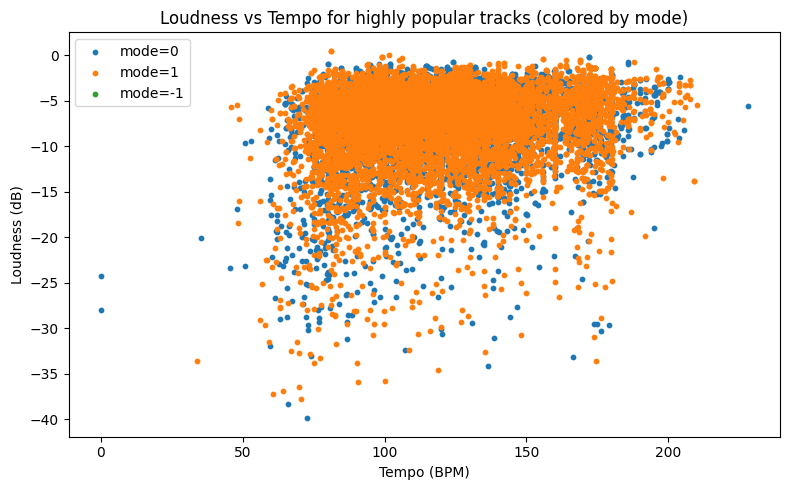


Correlation matrix (loudness, tempo, mode) for highly popular tracks:
          loudness     tempo      mode
loudness  1.000000  0.142603 -0.036101
tempo     0.142603  1.000000  0.001901
mode     -0.036101  0.001901  1.000000

'Recipe' for a highly popular track (median values):


,median_loudness_db,median_tempo_bpm,most_common_mode
0,-6.324,118.003,1.0


In [ ]:
# ---------- 3) Popular mix recipe: loudness, tempo, and mode (major/minor) ----------
# For the highly popular subset (top quartile)
hp = high_pop.copy()

# Basic stats
mix_stats = hp[["loudness","tempo","mode"]].describe().T
print("\nSummary statistics for loudness, tempo, and mode among highly popular tracks:")
print(mix_stats)

# How mode distributes (0 = minor, 1 = major) among highly popular tracks
mode_counts = hp["mode"].value_counts(dropna=False).rename_axis("mode").reset_index(name="count")
print("\nMode distribution among highly popular tracks:")
print(mode_counts)

# Average loudness and tempo by mode
mode_grouped = hp.groupby("mode").agg(
    mean_loudness=("loudness","mean"),
    median_loudness=("loudness","median"),
    mean_tempo=("tempo","mean"),
    median_tempo=("tempo","median"),
    n=("tempo","size")
).reset_index()
print("\nAverage loudness and tempo grouped by mode for highly popular tracks:")
print(mode_grouped)

# Scatter plot loudness vs tempo colored by mode (use different markers)
plt.figure(figsize=(8,5))
modes = hp["mode"].dropna().unique()
for m in modes:
    sub = hp[hp["mode"] == m]
    plt.scatter(sub["tempo"], sub["loudness"], label=f"mode={int(m)}", s=10)
plt.xlabel("Tempo (BPM)")
plt.ylabel("Loudness (dB)")
plt.title("Loudness vs Tempo for highly popular tracks (colored by mode)")
plt.legend()
plt.tight_layout()
plt.savefig("Loudness_vs_Tempo_for_highly_popular_tracks_colored_by_mode.png")
plt.show()

# Correlation among loudness, tempo, mode (mode converted to numeric if needed)
corr_df = hp[["loudness","tempo","mode"]].dropna().corr()
print("\nCorrelation matrix (loudness, tempo, mode) for highly popular tracks:")
print(corr_df)

recipe = {
    "median_loudness_db": hp["loudness"].median(),
    "median_tempo_bpm": hp["tempo"].median(),
    "most_common_mode": hp["mode"].mode()[0]
}
recipe_df = pd.DataFrame([recipe])
print("\n'Recipe' for a highly popular track (median values):")
display(recipe_df)

# **Key Insights and Implementations**

**1. Danceability + Energy + Valence**

* Insight: Popular songs lean toward medium–high danceability, high energy, moderate positivity.

* Implementation: Focus on groovy, rhythmic beats.
Keep energy high with strong percussion, bright synths, and layered instruments.
Maintain emotional balance: not overly happy, but not too dark either.



**2. Sound Profiles (Acousticness, Instrumentalness, Speechiness) **

* Insight: Popular tracks cluster around urban/hip-hop (high speechiness) and EDM/electronic (low acousticness, high instrumental layers).

* Implementation:Incorporate rap-style vocals, rhythmic spoken elements, or vocal chops.
Use EDM textures (drops, synth layers) to appeal to mainstream listeners.
Avoid purely acoustic/stripped-down mixes unless aiming for niche/indie appeal.



**3. Mix & Technical Recipe (Loudness, Tempo, Mode)**

* Insight:Loudness: ~-6 to -7 dB RMS.

          Tempo: 100–130 BPM is most common.

          Mode: Majority in major key.

* Implementation:
Mix to -6 to -7 dB for streaming competitiveness (master with controlled limiting).
Write/produce tracks in the 110–125 BPM range for crossover between pop, EDM, and hip-hop.
Favor major keys for broad appeal, but sprinkle minor sections for mood contrast.

# **7. TIME SERIES ANALYSIS**

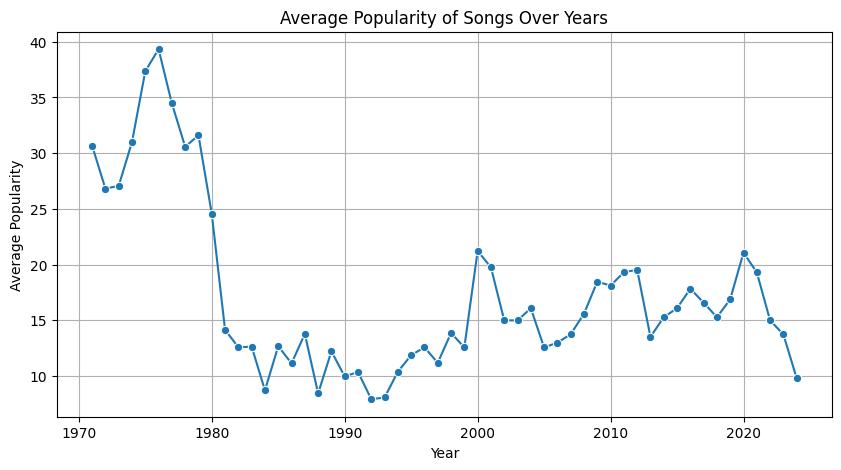

In [ ]:
# Clean invalid values (replace -1 and unrealistic loudness with NaN)
for col in ["acousticness","danceability","duration_ms","energy","instrumentalness",
            "liveness","loudness","speechiness","tempo","time_signature","valence","key"]:
    spotify_df.loc[spotify_df[col] == -1, col] = pd.NA

spotify_df.loc[spotify_df["loudness"] < -60, "loudness"] = pd.NA

# Define top popularity quartile threshold
pop_75 = spotify_df["popularity"].quantile(0.75)
spotify_df["is_popular"] = spotify_df["popularity"] >= pop_75

# ---------------------- 1. Average Popularity over Years ----------------------
avg_pop_year = spotify_df.groupby("year")["popularity"].mean().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data=avg_pop_year, x="year", y="popularity", marker="o")
plt.title("Average Popularity of Songs Over Years")
plt.ylabel("Average Popularity")
plt.xlabel("Year")
plt.grid(True)
plt.savefig("Average_Popularity_of_Songs_Over_Years.png")
plt.show()



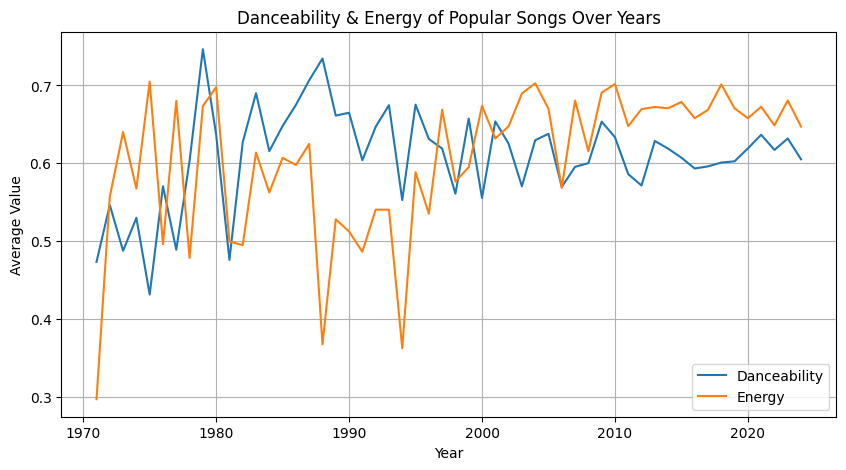

In [ ]:
# ---------------------- 2. Danceability & Energy shifts ----------------------
dance_energy_year = spotify_df[spotify_df["is_popular"]].groupby("year")[["danceability","energy"]].mean().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data=dance_energy_year, x="year", y="danceability", label="Danceability")
sns.lineplot(data=dance_energy_year, x="year", y="energy", label="Energy")
plt.title("Danceability & Energy of Popular Songs Over Years")
plt.ylabel("Average Value")
plt.xlabel("Year")
plt.legend()
plt.grid(True)
plt.savefig("Danceability_Energy_of_Popular_Songs_Over_Years.png")
plt.show()

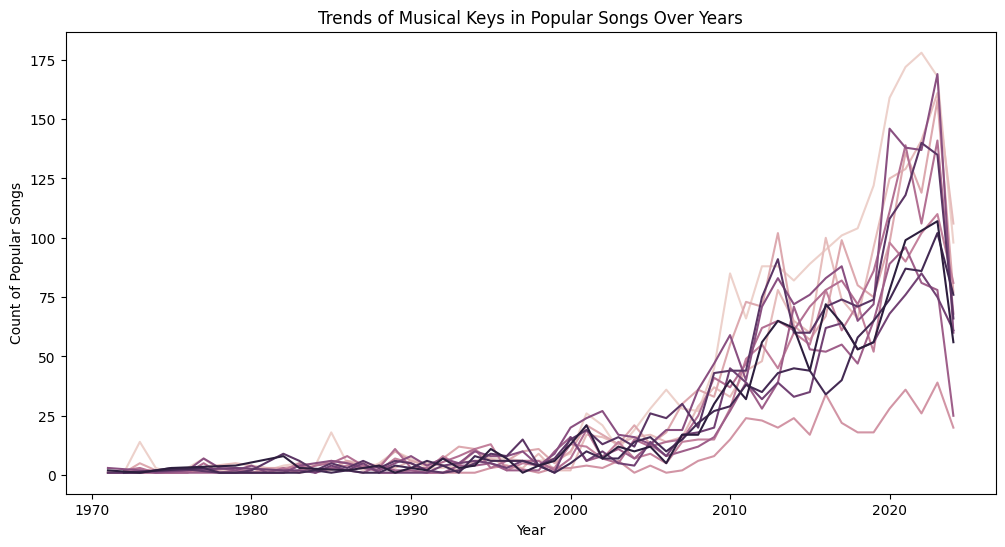

In [ ]:
# ---------------------- 3. Keys and Tempo trends ----------------------
# Keys: distribution of most common keys in popular songs per decade
key_counts = spotify_df[spotify_df["is_popular"]].groupby(["year","key"]).size().reset_index(name="count")

plt.figure(figsize=(12,6))
sns.lineplot(data=key_counts, x="year", y="count", hue="key", legend=False)
plt.title("Trends of Musical Keys in Popular Songs Over Years")
plt.ylabel("Count of Popular Songs")
plt.xlabel("Year")
plt.savefig("Trends_of_Musical_Keys_in_Popular_Songs_Over_Years.png")
plt.show()



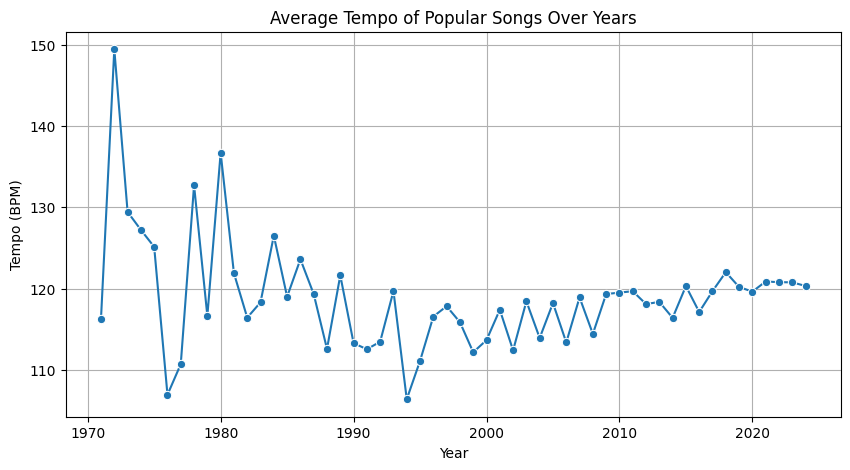

In [ ]:
# Tempo: average tempo in popular songs per year
tempo_year = spotify_df[spotify_df["is_popular"]].groupby("year")["tempo"].mean().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data=tempo_year, x="year", y="tempo", marker="o")
plt.title("Average Tempo of Popular Songs Over Years")
plt.ylabel("Tempo (BPM)")
plt.xlabel("Year")
plt.grid(True)
plt.savefig("Average_Tempo_of_Popular_Songs_Over_Years.png")
plt.show()

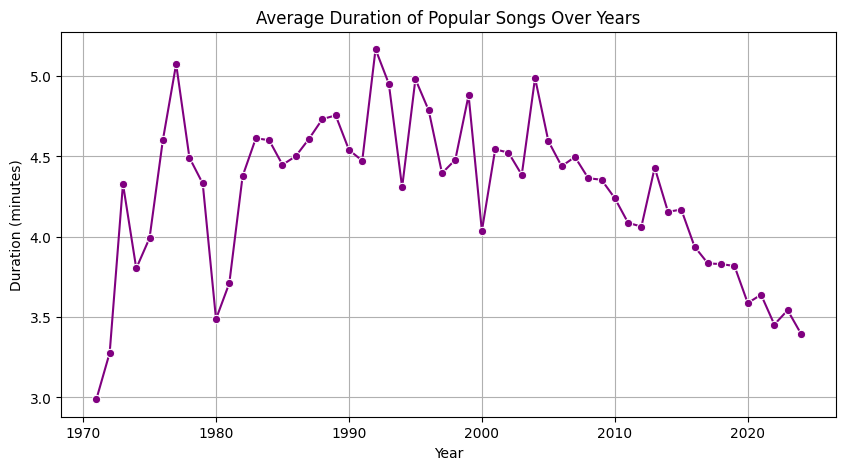

In [ ]:
# ---------------------- 4. Duration over time ----------------------
duration_year = spotify_df[spotify_df["is_popular"]].groupby("year")["duration_ms"].mean().reset_index()
# Convert to minutes for readability
duration_year["duration_min"] = duration_year["duration_ms"] / 60000

plt.figure(figsize=(10,5))
sns.lineplot(data=duration_year, x="year", y="duration_min", marker="o", color="purple")
plt.title("Average Duration of Popular Songs Over Years")
plt.ylabel("Duration (minutes)")
plt.xlabel("Year")
plt.grid(True)
plt.savefig("Average_Duration_of_Popular_Songs_Over_Years.png")
plt.show()

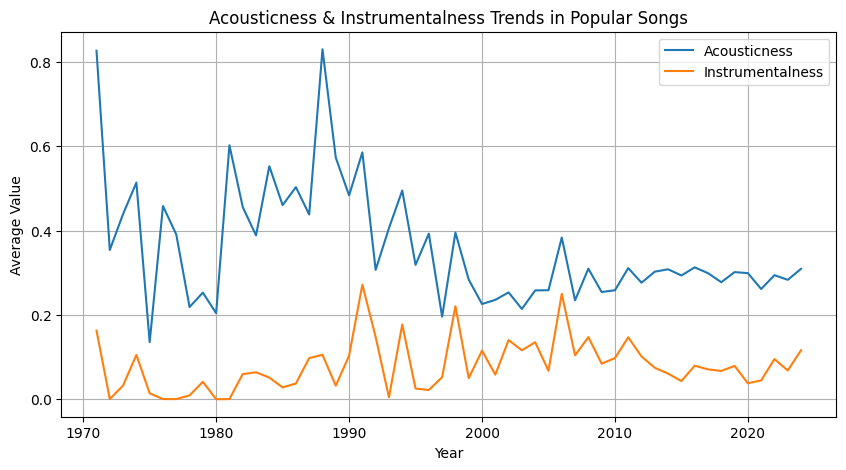

In [ ]:

# ---------------------- 5. Acousticness & Instrumentalness ----------------------
acoustic_instr_year = spotify_df[spotify_df["is_popular"]].groupby("year")[["acousticness","instrumentalness"]].mean().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data=acoustic_instr_year, x="year", y="acousticness", label="Acousticness")
sns.lineplot(data=acoustic_instr_year, x="year", y="instrumentalness", label="Instrumentalness")
plt.title("Acousticness & Instrumentalness Trends in Popular Songs")
plt.ylabel("Average Value")
plt.xlabel("Year")
plt.legend()
plt.grid(True)
plt.savefig("Acousticness_Instrumentalness_Trends_in_Popular_Songs.png")
plt.show()


##  Key Insights & Implementations

1. **Popularity Over Time**

   * *Newer songs (streaming era) are consistently more popular.
   * *Implementation:* Focus on **current streaming trends** when producing — optimize for playlists and viral potential.

2. **Danceability & Energy**

   *  Danceability has increased, energy stays high.
   *  *Implementation:* Prioritize **groovy beats** and **energetic arrangements** for mainstream appeal.

3. **Keys & Tempo**

   *  Mid-tempo (100–130 BPM) dominates; keys like **C, G, D** remain common.
   * *Implementation:* Write tracks in **dance/pop-friendly tempos** and stick to familiar keys for accessibility.

4. **Duration**

   *  Songs are getting **shorter** (~3 min now vs 4–5 min before).
   * *Implementation:* Keep songs **short, punchy, and replayable** to maximize streams.

5. **Acousticness & Instrumentalness**

   * Acoustic/Instrumental songs have declined; vocals dominate.
   *  *Implementation:* Make vocals **central and strong**, with modern electronic/urban production layers.



# **8. OUTLIER ANALYSIS**

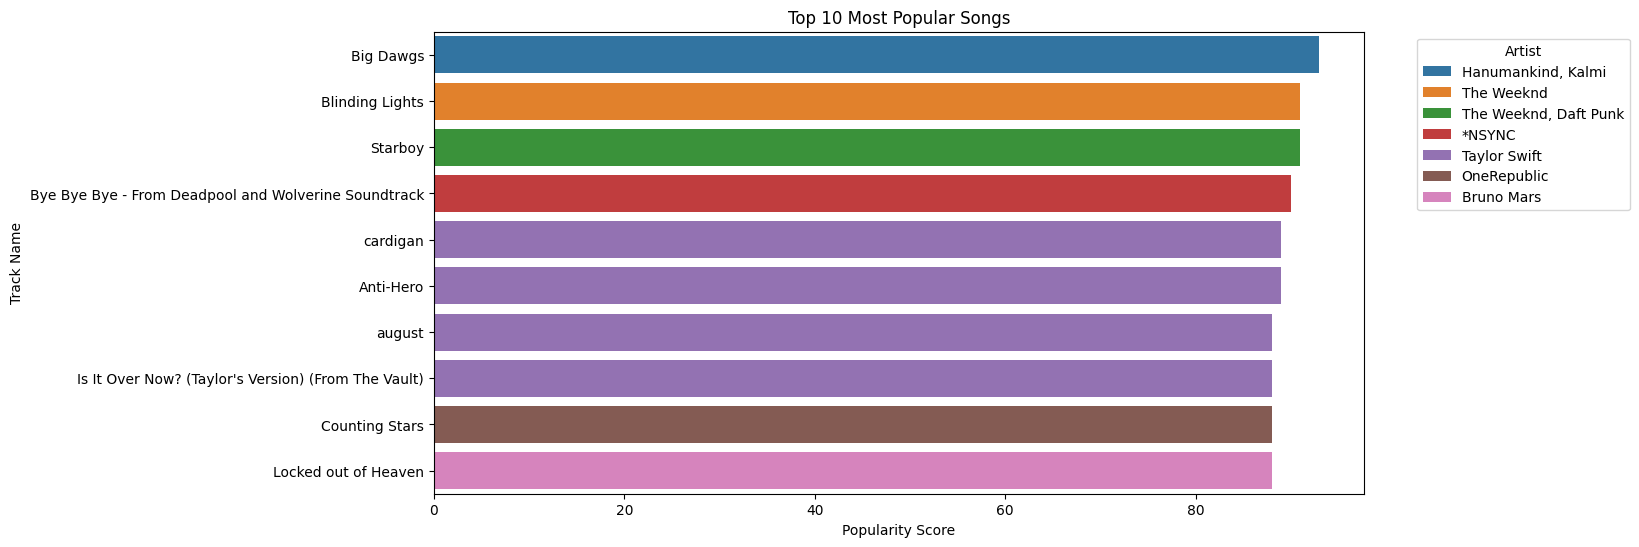

,track_name,artist_name,popularity,danceability,energy,valence,acousticness,tempo,duration_ms
49479,Big Dawgs,"Hanumankind, Kalmi",93,0.464,0.745,0.262,0.02350,180.098,190667.0
26432,Blinding Lights,The Weeknd,91,0.514,0.730,0.334,0.00146,171.005,200040.0
26580,Starboy,"The Weeknd, Daft Punk",91,0.679,0.587,0.486,0.14100,186.003,230453.0
54962,Bye Bye Bye - From Deadpool and Wolverine Soun...,*NSYNC,90,0.610,0.926,0.861,0.03100,172.638,200400.0
24273,cardigan,Taylor Swift,89,0.613,0.581,0.551,0.53700,130.033,239560.0
23702,Anti-Hero,Taylor Swift,89,0.637,0.643,0.533,0.13000,97.008,200690.0
24274,august,Taylor Swift,88,0.532,0.623,0.403,0.53800,89.937,261923.0
23514,Is It Over Now? (Taylor's Version) (From The V...,Taylor Swift,88,0.596,0.658,0.176,0.05040,100.012,229478.0
22876,Counting Stars,OneRepublic,88,0.664,0.705,0.477,0.06540,122.016,257267.0
38114,Locked out of Heaven,Bruno Mars,88,0.726,0.698,0.867,0.04900,143.994,233478.0


In [ ]:
# Sort songs by popularity and pick top 10
top10 = spotify_df.sort_values(by="popularity", ascending=False).head(10)

# Plot top 10 most popular songs
plt.figure(figsize=(12,6))
sns.barplot(data=top10, x="popularity", y="track_name", hue="artist_name", dodge=False)
plt.title("Top 10 Most Popular Songs")
plt.xlabel("Popularity Score")
plt.ylabel("Track Name")
plt.legend(title="Artist", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig("Top_10_Most_Popular_Songs.png")
plt.show()

top10[["track_name","artist_name","popularity","danceability","energy","valence","acousticness","tempo","duration_ms"]]


Top 1% popularity threshold = 70.0


/tmp/ipython-input-3462893210.py:21: UserWarning: Glyph 127911 (\N{HEADPHONE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3462893210.py:22: UserWarning: Glyph 127911 (\N{HEADPHONE}) missing from font(s) DejaVu Sans.
  plt.savefig('Top_1_Percent_Most_Popular_Spotify_Songs.png')
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127911 (\N{HEADPHONE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


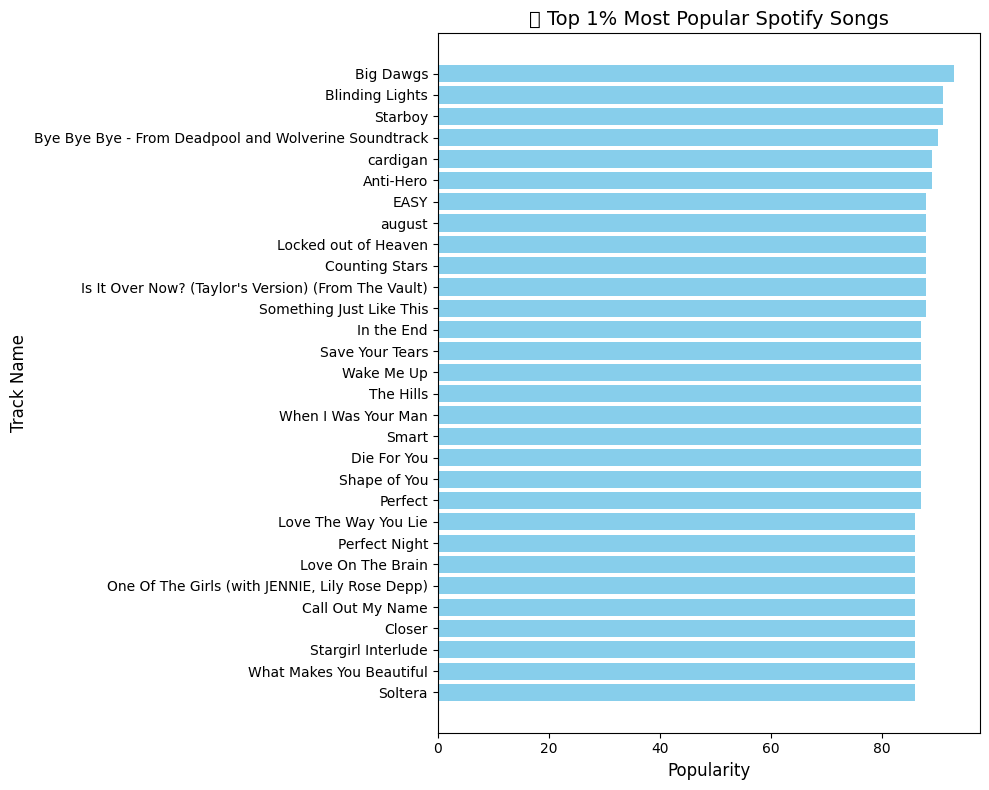

In [ ]:

# Find the threshold for top 1% popularity
threshold = spotify_df['popularity'].quantile(0.99)
print(f"Top 1% popularity threshold = {threshold}")

# Filter songs above this threshold
top_songs = spotify_df[spotify_df['popularity'] >= threshold]

#  Sort these songs by popularity (highest first)
top_songs_sorted = top_songs.sort_values(by='popularity', ascending=False)

#  Take only the top 30 songs for better visualization
top_30 = top_songs_sorted.head(30)

#  Plot a clean horizontal bar chart
plt.figure(figsize=(10, 8))
plt.barh(top_30['track_name'], top_30['popularity'], color='skyblue')
plt.xlabel('Popularity', fontsize=12)
plt.ylabel('Track Name', fontsize=12)
plt.title('🎧 Top 1% Most Popular Spotify Songs', fontsize=14)
plt.gca().invert_yaxis()  # Show highest popularity on top
plt.tight_layout()
plt.savefig('Top_1_Percent_Most_Popular_Spotify_Songs.png')
plt.show()

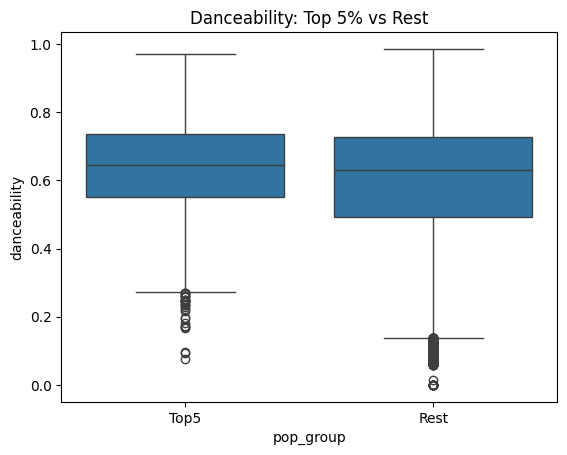

In [ ]:
#  Ensure numeric columns are numeric
num_cols = ['popularity','danceability','acousticness','energy','tempo','valence','duration_ms']
for c in num_cols:
    if c in spotify_df.columns:
        spotify_df[c] = pd.to_numeric(spotify_df[c], errors='coerce')

#  Create grouping label for Top 5% vs Rest
q95 = spotify_df['popularity'].quantile(0.95)
spotify_df['pop_group'] = np.where(spotify_df['popularity'] >= q95, 'Top5', 'Rest')


#  Plot 1: Boxplot Danceability by group
sns.boxplot(data=spotify_df, x='pop_group', y='danceability')
plt.title('Danceability: Top 5% vs Rest')
plt.savefig('Danceability_Top_5_vs_Rest.png')
plt.show()

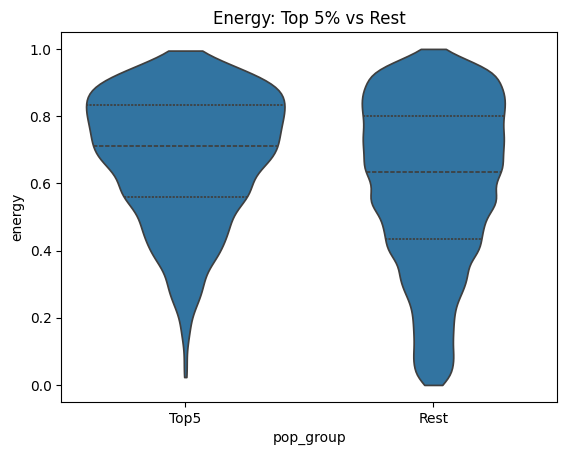

In [ ]:
# Plot 2: Violinplot Energy by group
sns.violinplot(data=spotify_df, x='pop_group', y='energy', inner='quartile', cut=0)
plt.title('Energy: Top 5% vs Rest')
plt.savefig('Energy_Top_5_vs_Rest.png')
plt.show()

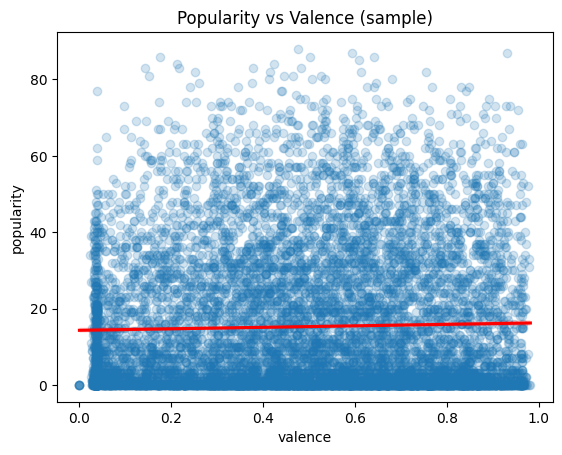

In [ ]:
# Plot 3: Scatter Popularity vs Valence with trend
sns.regplot(data=spotify_df.sample(min(len(spotify_df), 10000), random_state=42), x='valence', y='popularity', scatter_kws={'alpha':0.2}, line_kws={'color':'red'})
plt.title('Popularity vs Valence (sample)')
plt.savefig('Popularity_vs_Valence_sample.png')
plt.show()

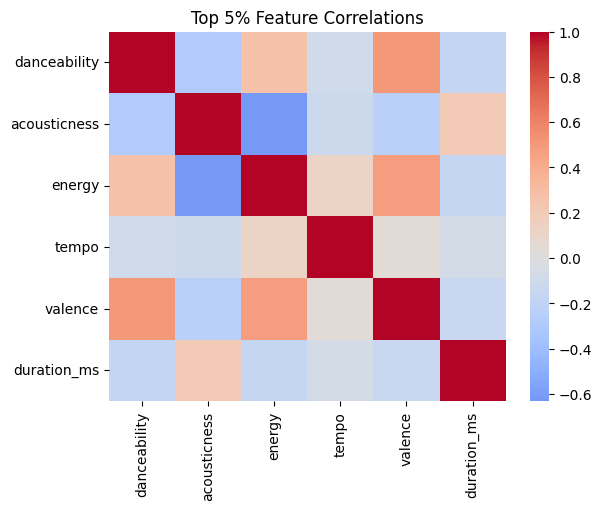

In [ ]:
#  Plot 4: Correlation heatmap of audio features (Top5 only)
features = ['danceability','acousticness','energy','tempo','valence','duration_ms']

# Define most popular as top 5% by popularity
q95 = spotify_df['popularity'].quantile(0.95)
spotify_df['pop_group'] = np.where(spotify_df['popularity'] >= q95, 'Top5', 'Rest')

Top5 = spotify_df[spotify_df['pop_group']=='Top5']
cor_mat = Top5[features].corr(numeric_only=True)
sns.heatmap(cor_mat, annot=False, cmap='coolwarm', center=0)
plt.title('Top 5% Feature Correlations')
plt.savefig('Top_5_Feature_Correlations.png')
plt.show()

# **Key Insights and Implementations**

1) Danceability: Top 5% vs Rest

* Insight: Top 5% tracks tend to have higher danceability and a tighter spread. Popular tracks cluster into a more consistently danceable range.

2) Energy: Top 5% vs Rest

* Insight: Highly popular tracks skew toward higher energy with fewer very-low-energy outliers. Energy appears to be a favorable attribute for popularity.

3) Popularity vs Valence (sample + trendline)

* Insight: There’s a mild positive trend: happier-sounding songs (higher valence) tend to be slightly more popular, but the effect size is modest—valence alone doesn’t explain popularity.

4) Feature correlations among the Top 5%

* Insight: No single pair dominates. Relationships are moderate at best, suggesting popular tracks are a balanced blend of traits rather than driven by one metric. This supports a multifactor view of popularity.




**Practical implementation takeaways **

* Push danceability and energy to an above-median band without overextremes. This aligns with where Top 5% tracks cluster.

* Treat valence as a tuning knob, not a cornerstone. Slightly happier vibes help, but don’t overfit on “happy.”

* Optimize the mix: within top-performing tracks, features don’t show extreme correlations, implying that crafting the right combination (rather than maximizing one metric) is more effective.

* For modeling, expect interactions to matter. Consider tree-based methods or interaction terms if you’re regressing on popularity.

# 9. Recommendation for the mixing engineer supported by insight

1. Prioritize High-Potential Tracks

Insight: Popularity follows a power-law—only a few tracks dominate

 Recommendation: Don’t treat every song the same. Allocate your best production, mixing, and marketing efforts to songs with strong hooks, energy, and genre relevance.

 2. Mix for Energy and Danceability First

Insight: Energy is the strongest positive driver; danceability clusters in top tracks

 Recommendation: Use layered drums, punchy percussion, transient clarity, and tight kick–bass relationships. Aim for medium-high danceability and consistent groove.

 3. Stay in the Winning Tempo Zone (100–130 BPM)

Insight: Most popular tracks sit between 110–130 BPM

 Recommendation: Build songs in the 118–128 BPM range for pop/dance, or halftime 70–90 for hip-hop/R&B. This aligns with both streaming and club performance.

 4. Use Controlled, Competitive Loudness

Insight: Popular songs sit around -6 to -10 LUFS; loudness alone doesn't drive popularity

 Recommendation: Master at -9 to -7 LUFS with true peaks under -1 dBTP. Preserve punch with parallel compression and avoid over-limiting.

5. Structure Songs for Fast Engagement

Insight: Duration doesn’t drive popularity, but shorter songs win in streams

 Recommendation: Keep total length around 2:30–3:10. Hit the first hook within 30–40 seconds. Avoid long intros and meandering sections.

 6. Favor 4/4 and Modern Production Textures
Insight: 4/4 dominates; acousticness trends slightly negative

 Recommendation: Stick to 4/4 for accessibility. For acoustic songs, add electronic layers, modern drums, or subtle synth textures to stay relevant.

7. Lean Into High-Energy Mix Arcs

 Insight: Top songs show energy build patterns

       Recommendation:
Arrange with dynamic lift:

Verse → moderate

Pre-chorus → rising

Chorus → maximum impact

Bridge → contrast, then re-lift


8. Adopt Global Sound Standards (K-Pop, EDM, Modern Pop)

Insight: Korean songs have the highest mean popularity

 Recommendation: Incorporate global mixing traits: bright vocal stacks, polished low end, hybrid synth/acoustic blending, punchy master chains.

9. Vocals Front and Center

Insight: Instrumentalness and acousticness decline over time; speechiness plays a role

       Recommendation:
 For pop: prioritize melodic vocals with clarity (2–6 kHz).

 For rap/urban: use rhythmic vocal phrasing or sung hooks. Avoid muddy midrange.

10. Balance Features Instead of Chasing One Metric

Insight (Top 5% tracks): No single feature dominates—it's a blend

       Recommendation:
       
 Design songs with a mix of:
  Medium-high energy
  Moderate positivity
  Groove-focused rhythm
  Clear vocals
  Tight low end
         Avoid extremes—synergy matters more than maxing one trait.